In [18]:
#exploatory dat analysis and machine learning 
import pandas as pd
import os
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import *
from  sklearn.model_selection import *
import numpy as np
import os
%matplotlib inline

In [41]:
df= pd.read_csv('data/surrey_zillow_clean.csv')
df

,price,sqft,bds,ba
0,689999.0,806.0,2.0,2.0
1,699900.0,935.0,2.0,2.0
2,674000.0,809.0,2.0,2.0
3,689900.0,821.0,2.0,2.0
4,658000.0,1152.0,2.0,2.0
...,...,...,...,...
107,619000.0,1179.0,3.0,2.0
108,425000.0,552.0,1.0,1.0
109,408800.0,569.0,1.0,1.0
110,868000.0,1300.0,2.0,2.0


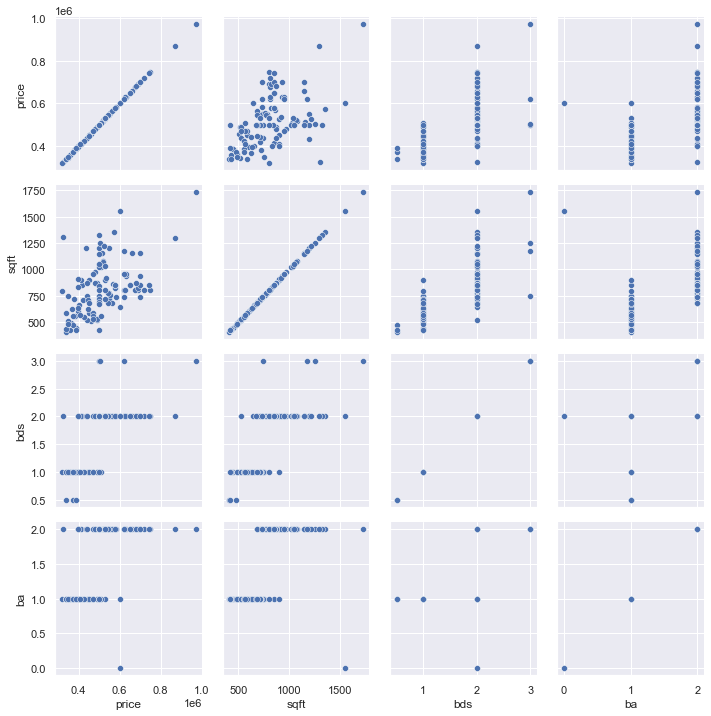

In [20]:
#enable grid plot 
g= sns.PairGrid(df)
g.map(sns.scatterplot)

It appears there is a relationship between square footage and price so we shall do a linear regression model on those variables

## Simple Linear Regression Model

In [21]:
#utilize variables
X= df['sqft'].values.reshape(-1,1)
y=df['price'].values.reshape(-1,1)

C:\Users\epicr\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


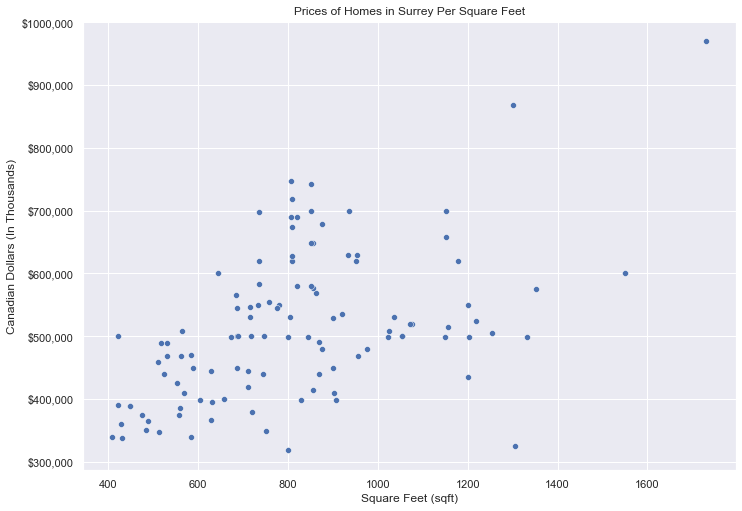

In [27]:
# Apply the default theme
a4_dims = (11.7, 8.27)
ax = plt.subplots(figsize=a4_dims)
sns.set_theme()

custom_yticks= ['$200,000', '$300,000','$400,000','$500,000','$600,000','$700,000','$800,000','$900,000','$1000,000' ,'$1100,000']

plot=sns.scatterplot(data=df, x="sqft", y="price").set(xlabel="Square Feet (sqft)",
                                                          ylabel = "Canadian Dollars (In Thousands)",
                                                          title='Prices of Homes in Surrey Per Square Feet',
                                                          yticklabels= custom_yticks)



In [52]:
#splitting data: y value will be sales and x valuew ill be square footage
X_train, X_test, y_train, y_test= train_test_split (X,y, test_size= 0.2, random_state=42)

In [53]:
#setting linera regression to the training set
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0.5, 1.0, 'Prices of Homes in Surrey Per Square Feet')

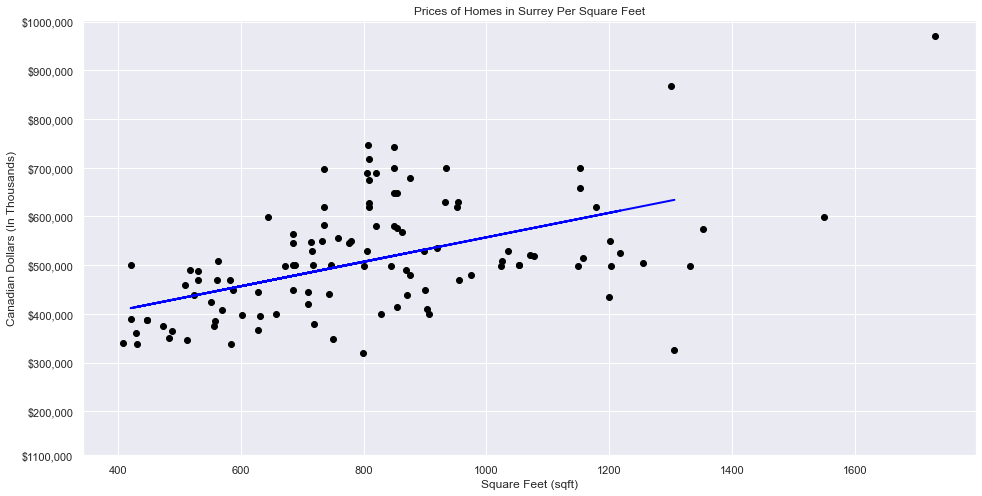

In [54]:
#initial plot 
intervals= ([200000,300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000,110000])
y_pred=reg.predict(X_test)
plt.figure(figsize=(16,8))
plt.scatter(X,y,c="black")
plt.plot(X_test,y_pred,c="blue",linewidth=2)
plt.xlabel("Square Feet (sqft)")
plt.ylabel("Canadian Dollars (In Thousands)")
plt.yticks(intervals,custom_yticks)
plt.title('Prices of Homes in Surrey Per Square Feet')

C:\Users\epicr\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


[Text(0.5, 0, 'Square Feet (sqft)'),
 Text(0, 0.5, 'Canadian Dollars (In Thousands)'),
 Text(0.5, 1.0, 'Prices of Homes in Surrey Per Square Feet'),
 [Text(0, 200000.0, '$200,000'),
  Text(0, 300000.0, '$300,000'),
  Text(0, 400000.0, '$400,000'),
  Text(0, 500000.0, '$500,000'),
  Text(0, 600000.0, '$600,000'),
  Text(0, 700000.0, '$700,000'),
  Text(0, 800000.0, '$800,000'),
  Text(0, 900000.0, '$900,000'),
  Text(0, 1000000.0, '$1000,000'),
  Text(0, 1100000.0, '$1100,000')]]

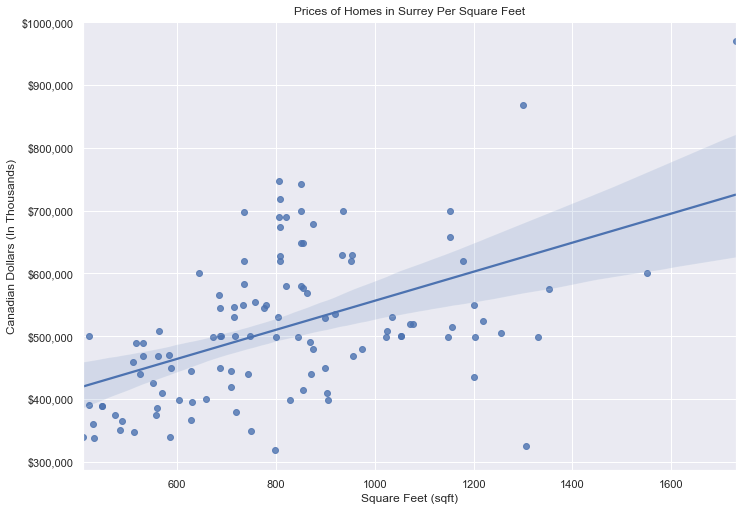

In [55]:
#plot with confidence intervals 

a4_dims = (11.7, 8.27)
ax = plt.subplots(figsize=a4_dims)
sns.regplot(x=X, y=y, data=df).set(xlabel="Square Feet (sqft)",
                                                          ylabel = "Canadian Dollars (In Thousands)",
                                                          title='Prices of Homes in Surrey Per Square Feet',
                                                          yticklabels= custom_yticks)

In [56]:
#calculating coefficients:
reg.coef_

array([[251.12224442]])

In [57]:
#calculating intercept
reg.intercept_

array([306084.28216851])

In [64]:
#calculate the R squared Value 
from sklearn.metrics import r2_score
r2_score(ytest,y_pred) # R^2 seems to be low, so we should try multiple linear regression

0.003933357528996928

In [69]:
#testing different values of square feet 
output= reg.predict([[500]])
output2= reg.predict([[800]])
output3= reg.predict([[1400]])
output, output2,output3

(array([[431645.40438025]]),
 array([[506982.07770729]]),
 array([[657655.42436137]]))

## Multiple Linear Regression

In [70]:
#initial vairalbes
X2= df.drop(['price'], axis=1)
y2= df['price'].values.reshape(-1,1)

In [73]:
#split dataset to trianing and testing score
X2_train, X2_test, y2_train, y2_test= train_test_split(X2,y2, test_size=0.2, random_state=42)

In [75]:
#fitting linear regression to training set
mult_reg=LinearRegression().fit(X2_train,y2_train)

In [78]:
#predicting thet est result
y_pred2=mult_reg.predict(X2_test)

In [79]:
mult_reg.coef_

array([[   95.8301643 , 72178.76503096, 36223.28043527]])

In [80]:
mult_reg.intercept_

array([253175.71850505])

In [82]:
r2_score(y2_test,y_pred2) # a little bit better

0.36395024742188

In [95]:
# takig input from user:
print("Input your house information:")
sq=float(input("Square Footage: "))
bd= float(input("Beds: "))
bath=float(input("Bath:"))

#predicting the sales with respesct to the inputs
output=mult_reg.predict([[sq,bd,bath]])
print ("You will get $ {:.2f} by a {} square footage, {} bed, and {} bath".format(output[0][0] if output else "not predictable",sq,bd,bath))


Input your house information:


Square Footage:  472
Beds:  1
Bath: 1


You will get $ 406809.60 by a 472.0 square footage, 1.0 bed, and 1.0 bath


In [97]:
# saving the model
import pickle
if not os.path.exists("models"):
    os.makedirs("models")
    
MODEL_PATH= "models/multiple_reg.sav"
pickle.dump(mult_reg,open(MODEL_PATH, "wb"))